#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [1]:
import torchvision
import torch as th
import torch.nn as nn

In [2]:
model = torchvision.models.efficientnet_b1(
    weights=torchvision.models.EfficientNet_B1_Weights.IMAGENET1K_V1
)

In [3]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
# model.classifier[1] = nn.Linear(in_features=1280, out_features=5)

model.classifier = nn.Sequential(
    nn.Linear(in_features=1280, out_features=1024*1024),
    nn.ReLU(),
    nn.Linear(in_features=1024*1024, out_features=5),
)

In [5]:
model.classifier

Sequential(
  (0): Linear(in_features=1280, out_features=1048576, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1048576, out_features=5, bias=True)
)

In [6]:
model.features[0][0].weight.requires_grad

True

In [7]:
model.features[0][0].weight.requires_grad_(False)

Parameter containing:
tensor([[[[ 3.8642e-01,  1.2241e-01,  5.0212e-01],
          [ 3.4997e-01,  1.1550e-01,  3.8508e-01],
          [ 3.8387e-01,  2.2056e-01,  9.6468e-02]],

         [[ 4.0602e-01,  5.6148e-01, -2.2251e-01],
          [ 1.4863e-01,  3.9573e-01, -1.5376e-01],
          [-4.0972e-01, -2.2052e-01, -3.6777e-01]],

         [[-1.3333e-01,  2.5190e-01, -1.4265e-01],
          [-2.0382e-01,  1.1603e-01, -9.3522e-02],
          [-8.1681e-02,  3.6629e-02,  9.3803e-02]]],


        [[[-6.9058e-02,  2.8358e-01, -2.4048e-01],
          [-5.1645e-02,  6.1927e-01, -5.3088e-01],
          [-1.1722e-02,  2.8499e-01, -3.0543e-01]],

         [[-3.0572e-02,  4.9295e-01, -4.7230e-01],
          [-3.8374e-02,  1.0284e+00, -9.7627e-01],
          [ 3.5327e-02,  4.7342e-01, -4.9546e-01]],

         [[-3.1007e-02,  1.1951e-01, -7.2655e-02],
          [-7.1973e-02,  3.3143e-01, -2.7283e-01],
          [ 2.4259e-02,  8.3443e-02, -1.4971e-01]]],


        [[[ 2.0461e-01, -6.1518e-02,  9.1279

In [8]:
model.features[0][0].weight.requires_grad

False

In [9]:
for name, param in model.named_parameters():
  print(name)
  if name.startswith("features"):
    param.requires_grad_(False)
  break

features.0.0.weight


In [10]:
images = th.randint(0, 255, (16, 3, 500, 500)).float()

In [ ]:
out = model(images)

In [ ]:
out.shape

In [ ]:
t = torchvision.models.EfficientNet_B1_Weights.IMAGENET1K_V1.transforms()
t

In [ ]:
images_t = t(images)
images_t.shape

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [х] Проверено на семинаре

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms as T
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [4]:
import torch
import torchvision.models as models

In [5]:
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 102MB/s]


In [6]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

138357544

In [8]:
# model_children = [x for x in model.children()]
# len(model_children)

In [9]:
def count_layers(model):
    count = 0
    for layer in model.children():
        if isinstance(layer, torch.nn.Sequential):

            count += count_layers(layer)
        else:
            count += 1
    return count


In [10]:
count_layers(model)

39

<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [х] Проверено на семинаре

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import shutil

archive_path = '/content/drive/My Drive/cat_breeds_4.zip'
extract_path = 'cat_breeds_4.zip'
shutil.copy(archive_path, extract_path)


'cat_breeds_4.zip'

In [ ]:
# !unzip cat_breeds_4.zip

In [14]:
from torch.utils.data import Dataset
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, idx):
        x, y = self.subset[idx]
        return self.transform(x), y


    def __len__(self):
        return len(self.subset)

In [15]:
dataset = ImageFolder(root='/content/cat_breeds_4')

In [16]:
train, test = random_split(dataset, lengths=[0.8, 0.2])

In [17]:
train_t = T.Compose([
    T.Resize((256, 256)),
    T.CenterCrop((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

test_t = models.VGG16_Weights.IMAGENET1K_V1.transforms()

In [18]:
train = DatasetFromSubset(train, train_t)
test = DatasetFromSubset(test, test_t)

In [19]:
train[0]

(tensor([[[-1.5357, -1.5185, -1.4672,  ...,  0.4679,  0.6221,  0.6906],
          [-1.5357, -1.5357, -1.5014,  ...,  0.8447,  1.4098,  1.3070],
          [-1.5357, -1.5357, -1.5185,  ...,  0.7591,  1.3413,  1.3242],
          ...,
          [ 0.8789,  0.9132,  0.8789,  ...,  0.5536,  0.7591,  0.9474],
          [ 1.8722,  1.9578,  2.0434,  ...,  0.2453,  0.4337,  0.5707],
          [ 1.8208,  1.8893,  2.0092,  ...,  0.3994,  0.7591,  1.0159]],
 
         [[-1.7906, -1.7906, -1.7731,  ..., -0.5826, -0.4251, -0.3725],
          [-1.7556, -1.7556, -1.7906,  ..., -0.1975,  0.3803,  0.2752],
          [-1.7556, -1.7556, -1.7906,  ..., -0.2850,  0.3102,  0.2927],
          ...,
          [ 0.2402,  0.2577,  0.2577,  ..., -0.5476, -0.3725, -0.1975],
          [ 1.2206,  1.2731,  1.4307,  ..., -0.7752, -0.6176, -0.4776],
          [ 1.1681,  1.2031,  1.2556,  ..., -0.5476, -0.2150,  0.0476]],
 
         [[-1.7522, -1.7522, -1.7522,  ..., -1.5430, -1.3513, -1.2990],
          [-1.6999, -1.7173,

In [46]:
batch_size = 32
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)

<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

In [68]:
model = models.vgg16(pretrained=True)

In [69]:
# model

In [70]:
for param in model.parameters():
    param.requires_grad = False


In [71]:
num_classes = len(dataset.classes)


In [72]:
model.classifier[6] = nn.Linear(4096, num_classes)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs=10

In [75]:
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

In [76]:
%%time
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)


        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()



        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(running_loss / len(train_loader))


    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)


            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracy_list.append(test_accuracy)

    print(f'Epoch {epoch+1}, Loss: {train_loss_list[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1, Loss: 0.9957, Train Accuracy: 0.5844, Test Accuracy: 0.7612
Epoch 2, Loss: 0.7211, Train Accuracy: 0.7272, Test Accuracy: 0.7588
Epoch 3, Loss: 0.6662, Train Accuracy: 0.7388, Test Accuracy: 0.7738
Epoch 4, Loss: 0.6302, Train Accuracy: 0.7494, Test Accuracy: 0.7662
Epoch 5, Loss: 0.6060, Train Accuracy: 0.7550, Test Accuracy: 0.7688
Epoch 6, Loss: 0.5982, Train Accuracy: 0.7600, Test Accuracy: 0.7688
Epoch 7, Loss: 0.5854, Train Accuracy: 0.7700, Test Accuracy: 0.7800
Epoch 8, Loss: 0.5735, Train Accuracy: 0.7744, Test Accuracy: 0.7762
Epoch 9, Loss: 0.5722, Train Accuracy: 0.7709, Test Accuracy: 0.7875
Epoch 10, Loss: 0.5635, Train Accuracy: 0.7788, Test Accuracy: 0.7887
CPU times: user 5min 55s, sys: 2.02 s, total: 5min 57s
Wall time: 5min 58s


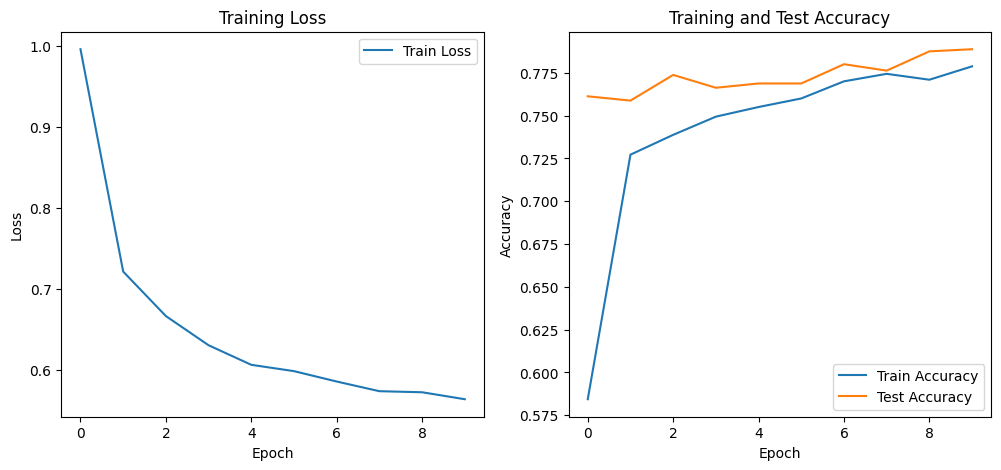

In [77]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')


plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')


plt.show()

In [78]:
train_accuracy_list[-1], test_accuracy_list[-1]


(0.77875, 0.78875)

<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей.

- [ ] Проверено на семинаре

In [79]:
model = models.vgg16(pretrained=True)


for name, param in model.named_parameters():
    if 'classifier' not in name:
        param.requires_grad = False


In [80]:
num_classes = len(dataset.classes)
model.classifier[6] = nn.Linear(4096, num_classes)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [82]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs=10

In [83]:
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

In [84]:
%%time
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)


        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()



        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(running_loss / len(train_loader))


    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)


            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracy_list.append(test_accuracy)

    print(f'Epoch {epoch+1}, Loss: {train_loss_list[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1, Loss: 0.9276, Train Accuracy: 0.6219, Test Accuracy: 0.7562
Epoch 2, Loss: 0.6890, Train Accuracy: 0.7297, Test Accuracy: 0.7700
Epoch 3, Loss: 0.6128, Train Accuracy: 0.7591, Test Accuracy: 0.7837
Epoch 4, Loss: 0.5901, Train Accuracy: 0.7650, Test Accuracy: 0.7812
Epoch 5, Loss: 0.5573, Train Accuracy: 0.7750, Test Accuracy: 0.7875
Epoch 6, Loss: 0.5369, Train Accuracy: 0.7825, Test Accuracy: 0.7925
Epoch 7, Loss: 0.5179, Train Accuracy: 0.7891, Test Accuracy: 0.7950
Epoch 8, Loss: 0.4935, Train Accuracy: 0.8034, Test Accuracy: 0.7937
Epoch 9, Loss: 0.4860, Train Accuracy: 0.8122, Test Accuracy: 0.7975
Epoch 10, Loss: 0.4760, Train Accuracy: 0.8091, Test Accuracy: 0.7937
CPU times: user 6min 2s, sys: 1.96 s, total: 6min 4s
Wall time: 6min 6s


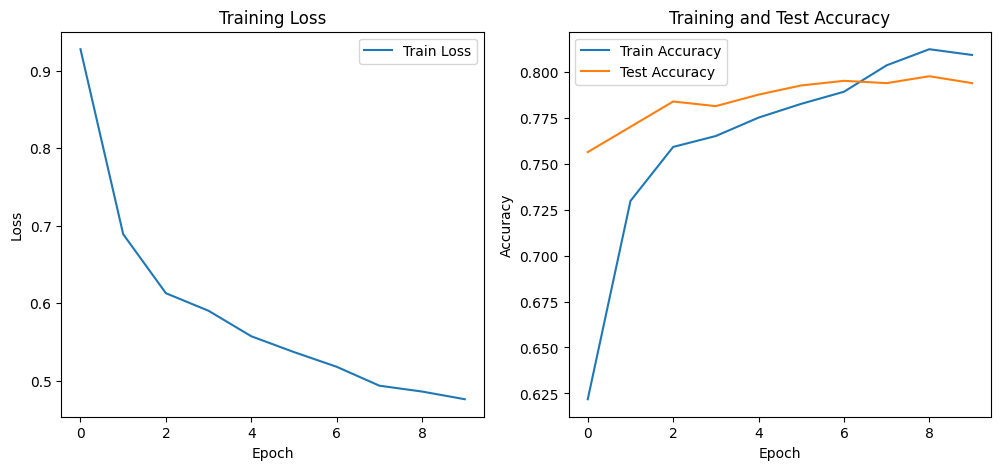

In [85]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')


plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')


plt.show()

In [86]:
train_accuracy_list[-1], test_accuracy_list[-1]


(0.8090625, 0.79375)

<p class="task" id="5"></p>

5\. Повторите решение задачи, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно.

- [ ] Проверено на семинаре

In [87]:
train_transforms = T.Compose([
    T.RandomResizedCrop(224), #Случайное обрезание
    T.RandomHorizontalFlip(), #Случайное отражение по горизонтали
    T.RandomRotation(10), # Случайное вращение до 10 градусов
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), #яркость, контраст, насыщенность, тон
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])


train, test = random_split(dataset, lengths=[0.8, 0.2])
train = DatasetFromSubset(train, train_transforms)
test = DatasetFromSubset(test, test_t)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)



In [ ]:
model = models.vgg16(pretrained=True)


for name, param in model.named_parameters():
    if 'classifier' not in name:
        param.requires_grad = False


In [89]:
num_classes = len(dataset.classes)
model.classifier[6] = nn.Linear(4096, num_classes)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [91]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs=10

In [92]:
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

In [93]:
%%time
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)


        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()



        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(running_loss / len(train_loader))


    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)


            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracy_list.append(test_accuracy)

    print(f'Epoch {epoch+1}, Loss: {train_loss_list[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1, Loss: 1.1192, Train Accuracy: 0.5256, Test Accuracy: 0.7063
Epoch 2, Loss: 0.9011, Train Accuracy: 0.6247, Test Accuracy: 0.7450
Epoch 3, Loss: 0.8492, Train Accuracy: 0.6450, Test Accuracy: 0.7550
Epoch 4, Loss: 0.8222, Train Accuracy: 0.6659, Test Accuracy: 0.7588
Epoch 5, Loss: 0.8012, Train Accuracy: 0.6753, Test Accuracy: 0.7625
Epoch 6, Loss: 0.7876, Train Accuracy: 0.6719, Test Accuracy: 0.7625
Epoch 7, Loss: 0.7301, Train Accuracy: 0.7025, Test Accuracy: 0.7650
Epoch 8, Loss: 0.7498, Train Accuracy: 0.6769, Test Accuracy: 0.7650
Epoch 9, Loss: 0.7253, Train Accuracy: 0.7078, Test Accuracy: 0.7675
Epoch 10, Loss: 0.7562, Train Accuracy: 0.6816, Test Accuracy: 0.7738
CPU times: user 9min 14s, sys: 2.6 s, total: 9min 16s
Wall time: 9min 28s


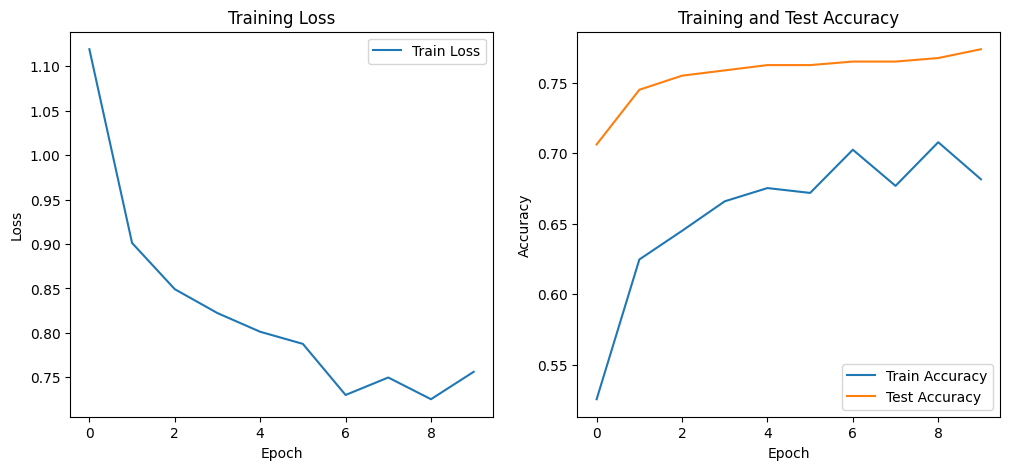

In [94]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')


plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')


plt.show()

In [95]:
train_accuracy_list[-1], test_accuracy_list[-1]


(0.6815625, 0.77375)

## Обратная связь
- [ ] Хочу получить обратную связь по решению